# Load dataset

In [1]:

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
def load_mnist(path, kind='train'):
    import os
    import struct
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

Training set size: (60000, 784)
Testing set size: (10000, 784)


In [4]:
from matplotlib import pyplot as plt,cm
def show_img(im,figsize=None,ax=None):
    if not ax: fig,ax = plt.subplots(figsize = figsize)
    ax.imshow(im,cmap=cm.binary)
    return ax

In [5]:
X_train = X_train.reshape([-1,28,28])
X_test = X_test.reshape([-1,28,28])

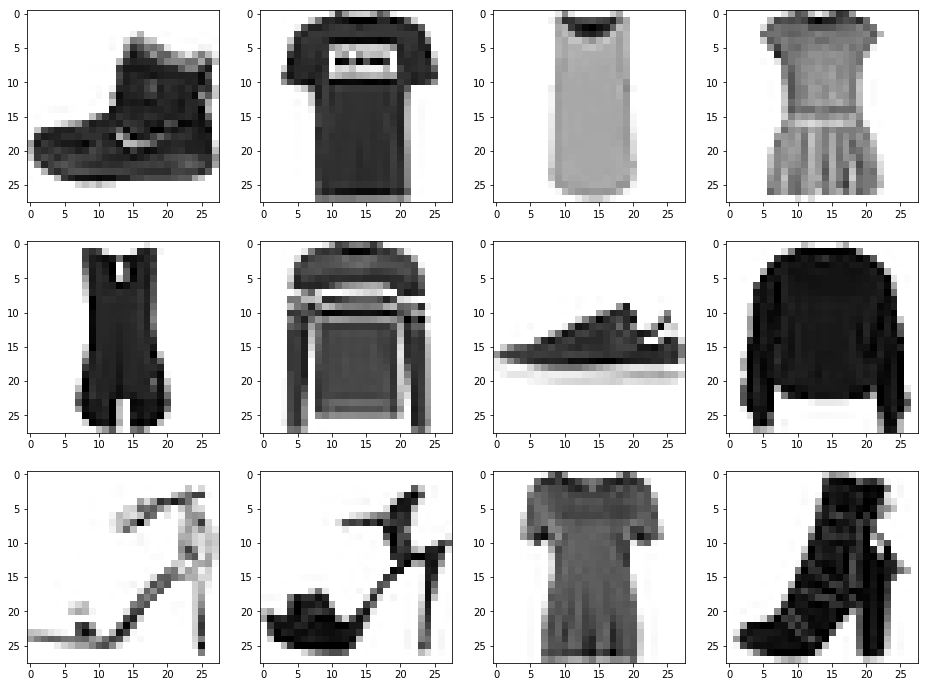

In [6]:
fig,axes=plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    show_img(X_train[i],ax=ax)

# Custom FashionMNIST data loader

Pytorch model expects data in minibatches and in torch tensors. We will use pytorch's DataLoader to do this

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
#To download the dataset for torchvision
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms

import numpy as np
import pandas as pd

In [26]:
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}

In [8]:
# custom dataset
class FMNIST(Dataset):
    def __init__(self,X,y,transforms=None):
        self.X = X[:,:,:,None] # n,28,28 to n,28,28,1
#         self.X = X
        self.y = y
        self.n = len(X)
        self.transforms = transforms
    
    def __getitem__(self,index):
        img = self.X[index]
        label = self.y[index]
        if self.transforms is not None:
            img = self.transforms(img)
        return (img,label)
    
    def __len__(self):
        return self.n
tsfms = transforms.ToTensor()

In [11]:
train_dl = DataLoader(FMNIST(X_train,y_train,tsfms),batch_size=12,shuffle=True,num_workers=0)

In [12]:
ba = next(iter(train_dl))

In [14]:
print(ba[0].shape)
print(ba[1].shape)

torch.Size([12, 1, 28, 28])
torch.Size([12])


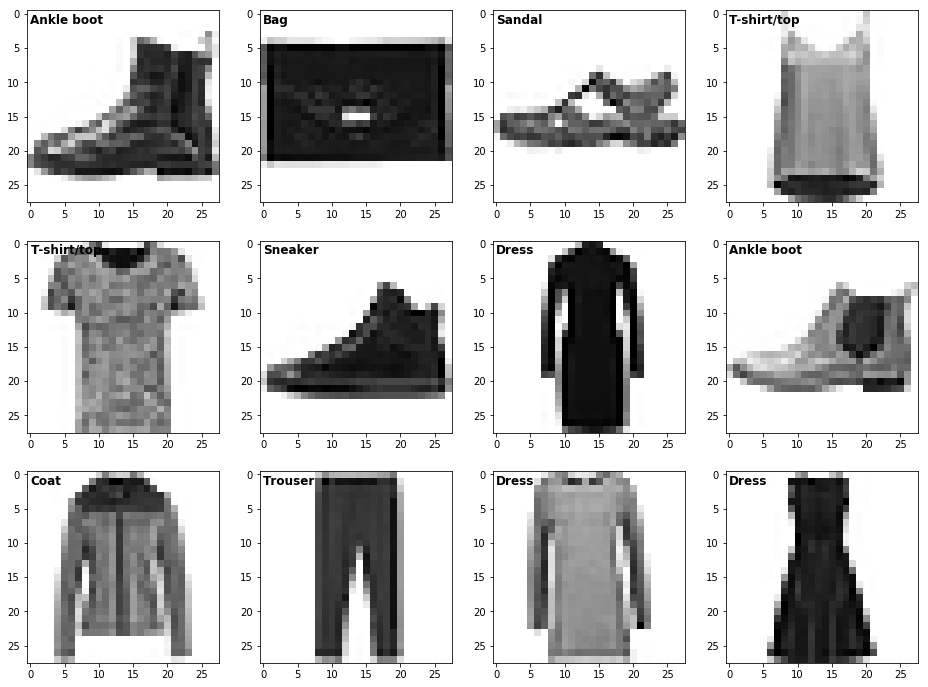

In [28]:
fig,axes=plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    ax=show_img(np.squeeze(ba[0].numpy()[i]),ax=ax)
    ax.text(0,0, labels[ba[1].numpy()[i]],
        verticalalignment='top', color='black', fontsize=12, weight='bold')